# Encontrar las mejores barras de chocolate

Trabaja en una empresa importadora de alimentos especiales que quiere expandirse al mercado de barras de chocolate gourmet. Su jefe necesita que su equipo investigue este mercado para informar su acercamiento inicial a proveedores potenciales. Después de encontrar calificaciones valiosas de barras de chocolate en línea, debe explorar si las barras de chocolate con las calificaciones más altas comparten alguna característica que pueda ayudarlo a limitar su búsqueda de proveedores (por ejemplo, porcentaje de cacao, país de origen del grano, etc.)

Tu desafío.

Cree un informe para resumir su investigación. Incluir:

- ¿Cuál es la calificación promedio por país de origen?
- ¿Cuántas barras se revisaron para cada uno de esos países?
- Cree gráficos para visualizar los hallazgos de las preguntas 1 y 2.
- ¿El origen del grano de cacao es un indicador de calidad?
- ¿Cómo se relaciona el contenido de cacao con la calificación? ¿Cuál es el contenido promedio de cacao para las barras con calificaciones más altas (más de 3,5)?
- Su investigación indica que algunos consumidores quieren evitar las barras con lecitina. Compare la calificación promedio de barras con y sin lecitina (L en los ingredientes).
- Resuma sus hallazgos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar datos
df = pd.read_csv("data/chocolate_bars.csv")
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [5]:
df["bean_origin"].unique()



array(['Tanzania', 'Dominican Republic', 'Madagascar', 'Fiji',
       'Venezuela', 'Uganda', 'India', 'Bolivia', 'Peru', 'Panama',
       'Colombia', 'Burma', 'Brazil', 'Papua New Guinea', 'Ecuador',
       'Cuba', 'Togo', 'Sao Tome', 'Mexico', 'Vanuatu', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Ghana', 'Belize', 'Blend',
       'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Haiti', 'Congo', 'Philippines', 'Solomon Islands', 'Malaysia',
       'Sri Lanka', 'Ivory Coast', 'Gabon', 'Taiwan', 'Puerto Rico',
       'Martinique', 'St. Lucia', 'Australia', 'Liberia', 'Sierra Leone',
       'U.S.A.', 'Nigeria', 'St.Vincent-Grenadines', 'Thailand', 'Tobago',
       'Sao Tome & Principe', 'Sumatra', 'El Salvador', 'Cameroon',
       'Samoa', 'China', 'Principe', 'Sulawesi', 'Suriname', 'DR Congo'],
      dtype=object)

In [7]:
df["bean_origin"].mean


<bound method Series.mean of 0                 Tanzania
1       Dominican Republic
2               Madagascar
3                     Fiji
4                Venezuela
               ...        
2525                 Blend
2526              Colombia
2527                 Blend
2528                 Congo
2529                Belize
Name: bean_origin, Length: 2530, dtype: object>

In [15]:
agrupadoratin =df.groupby(by="bean_origin").rating.mean().sort_values(ascending=False)#que operacion va a hacer con todo el registro 
agrupadoratin.head(10) #rating de los primeros 10 mejores

bean_origin
Tobago                 3.625000
China                  3.500000
Sao Tome & Principe    3.500000
Solomon Islands        3.450000
Congo                  3.318182
Thailand               3.300000
Cuba                   3.291667
Vietnam                3.287671
Papua New Guinea       3.280000
Madagascar             3.266949
Name: rating, dtype: float64

In [17]:
df[["manufacturer","bean_origin"]] #Sòlo saque los datos de manufacturer y de bean origin

,manufacturer,bean_origin
0,5150,Tanzania
1,5150,Dominican Republic
2,5150,Madagascar
3,5150,Fiji
4,5150,Venezuela
...,...,...
2525,Zotter,Blend
2526,Zotter,Colombia
2527,Zotter,Blend
2528,Zotter,Congo


In [ ]:
df[]

<AxesSubplot: xlabel='bean_origin'>

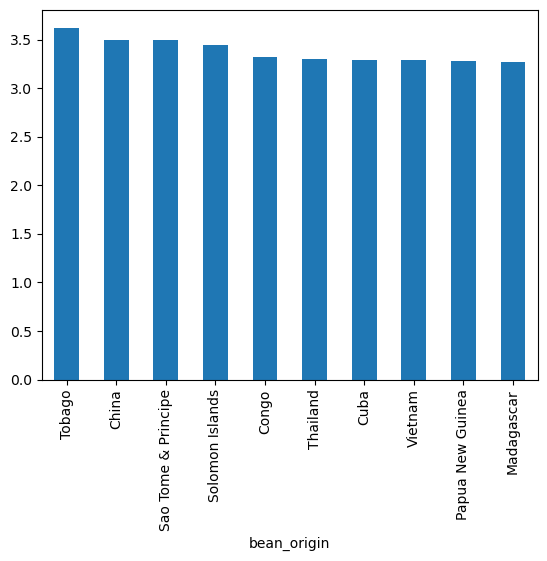

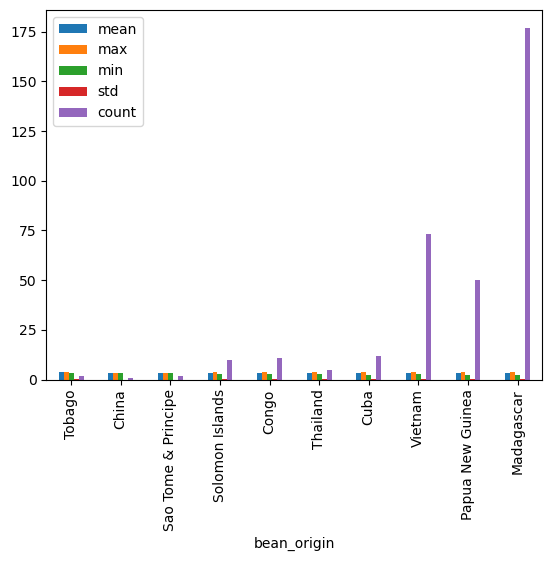

In [28]:

mediarating_pais = df.groupby(by="bean_origin")["rating"].agg(["mean","max","min","std","count"]).sort_values(by="mean", ascending=False)
mediarating_pais["mean"].head(10).plot(kind="bar")
mediarating_pais.head(10).plot(kind="bar")
#coud el numero de registros que da el pais
#sort_values ordena


In [26]:
mediarating_pais

,mean,max,min,std,count
bean_origin,,,,,
Tobago,3.625000,4.00,3.25,0.530330,2
China,3.500000,3.50,3.50,NaN,1
Sao Tome & Principe,3.500000,3.50,3.50,0.000000,2
Solomon Islands,3.450000,4.00,3.00,0.307318,10
Congo,3.318182,3.75,2.75,0.318019,11
...,...,...,...,...,...
Sierra Leone,2.750000,3.00,2.50,0.288675,4
St.Vincent-Grenadines,2.750000,2.75,2.75,NaN,1
Principe,2.750000,2.75,2.75,NaN,1
